In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
# matplotlib.rcParams.update({'font.size': 16})

In [2]:
# matplotlib.rcParams.update({'font.size': 16})

# Setup

In [3]:
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
red  = "#d93223"
gray = "#c6c3ba"
contrast_colors = ["#2d3359", "#f2cf63", "#f29544", "#f26d3d", "#d93223"]
brightness_grad = ["#d93223", "#a4271a", "#6f1a11", "#3a0d08", "#120402"]
hue_grad        = ["#2d3359", "#353356", "#3e3353", "#473351", "#50334e",
                   "#58324b", "#603348", "#693246", "#723344", "#7a3341",
                   "#83333e", "#8b333b", "#943339", "#9d3335", "#a63333",
                   "#ae3230", "#b7332d", "#bf332b", "#c73328", "#d13225"]

# File Reading

In [4]:
# Read a file containing one array
def read_file(filename, timeframe="ns"):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        if timeframe == "ns": 
            arr.append(meas/1000000)
        if timeframe == "ms":
            arr.append(meas)
    
    return np.array(arr)

# Plots

In [5]:
def loglogplot(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    ax.loglog(x, y, '.', alpha=loglogalpha, color=colors[3])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()

def violinplot(x, yscale="log"): # TODO: Maybe check out how to remove the outliers or try seaborn
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.violinplot(x)

# Determinant of the Covariance Matrix Computation Time 

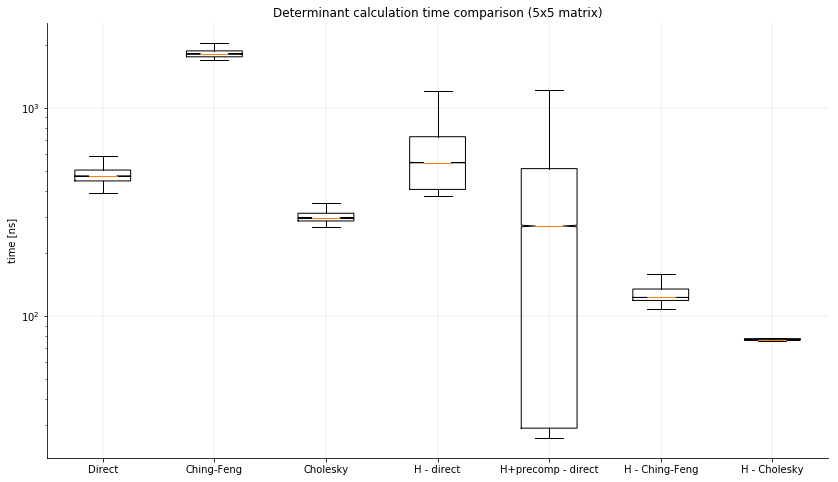

In [6]:
def boxplot(x, labels, ylabel, title, showfliers=True, yscale="log"):
    fig, ax = plt.subplots()

    plt.ylabel(ylabel)
    plt.title(title)
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.boxplot(x, labels=labels, notch=True, showfliers=showfliers)

file_names = ["m001", "m002", "m003", "m004", "m005", "m006", "m007", "m008", "m009", "m010", 
              "m020", "m030", "m040", "m050", "m060", "m070", "m080", "m090", "m100"]
labels = ["n=1",  "n=2",  "n=3",  "n=4",  "n=5",  "n=6",  "n=7",  "n=8",  "n=9", "n=10", 
          "n=20", "n=30", "n=40", "n=50", "n=60", "n=70", "n=80", "n=90", "n=100"]

org_arr = []
for file_name in ["org_det_ss-10e5/" + s + ".txt" for s in file_names]:
    org_arr.append(read_file(file_name))

cho_arr = []
for file_name in ["cho_det_ss-10e5/" + s + ".txt" for s in file_names]:
    cho_arr.append(read_file(file_name))

f_arr = []
for file_name in ["f_det_ss-10e5/" + s + ".txt" for s in file_names]:
    f_arr.append(read_file(file_name))

h_arr = []
h_arr.append(read_file("hardcoded_ss-10e5/noprecalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/precalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/chingfeng.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/cholesky.txt"))

ylabel = "time [ns]"

# title = "Determinant calculation of a nxn matrix through direct calculation"
# boxplot(org_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(org_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(org_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Cholesky decomposition"
# boxplot(cho_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(cho_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(cho_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Ching-Feng formula"
# boxplot(f_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(f_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(f_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

title = "Determinant calculation time comparison (5x5 matrix)"
names = ["Direct", "Ching-Feng", "Cholesky", "H - direct", "H+precomp - direct", "H - Ching-Feng"]
names.append("H - Cholesky")
arrs  = [org_arr[4]*10e5, f_arr[4]*10e5, cho_arr[4]*10e5, h_arr[0]*10e5, h_arr[1]*10e5, h_arr[2]*10e5]
arrs.append(h_arr[3]*10e5)
boxplot(arrs, names, ylabel, title, showfliers=False, yscale="log")

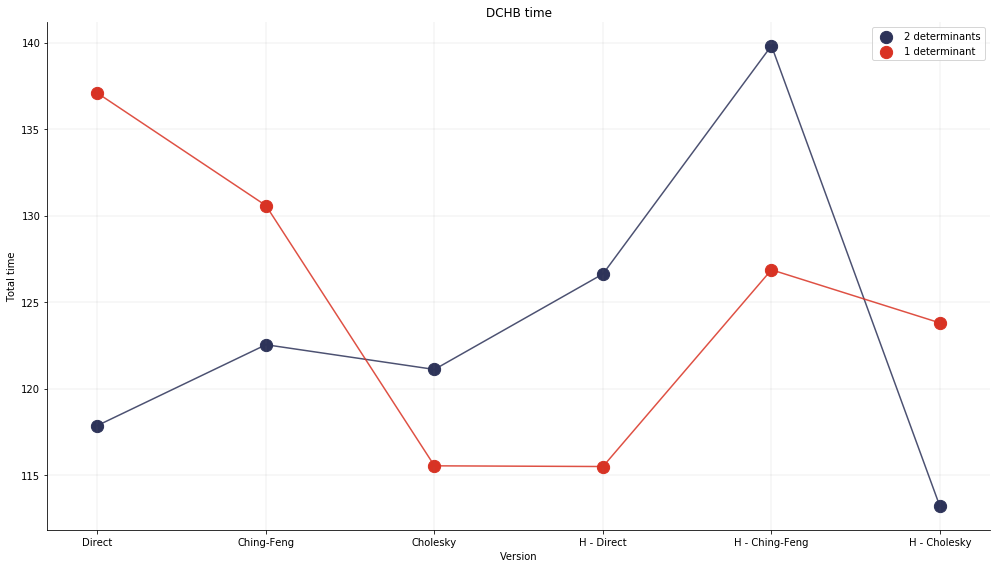

In [7]:
names      = ["Direct", "Ching-Feng", "Cholesky", "H - Direct", "H - Ching-Feng", "H - Cholesky"]
times_2det = np.array([117.87, 122.54, 121.11, 126.63, 139.82, 113.19])
times_1det = np.array([137.08, 130.58, 115.54, 115.50, 126.87, 123.80])

fig, ax = plt.subplots()

fig.set_size_inches(plot_size)
index = np.arange(len(names))

scatter2 = plt.scatter(index, times_2det, s=150, c=contrast_colors[0], label="2 determinants")
plot2    = plt.plot(   index, times_2det, c=contrast_colors[0], alpha=baralpha)
scatter1 = plt.scatter(index, times_1det, s=150, c=contrast_colors[4], label="1 determinant")
plot1    = plt.plot(   index, times_1det, c=contrast_colors[4], alpha=baralpha)

plt.xlabel("Version")
plt.ylabel("Total time")
plt.title("DCHB time")
plt.xticks(index, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

# Engine Times

Version:
* v1.0: Original JLab version
* v1.1: Refactored and micro-optimized
* v1.2: Sherman-Morrison formula implementated
* v1.3: Cholesky decomposition implemented
* v1.4.1: Multithreaded track finding
* v1.4.2: Multithreaded cluster finding
* v1.5: Current status

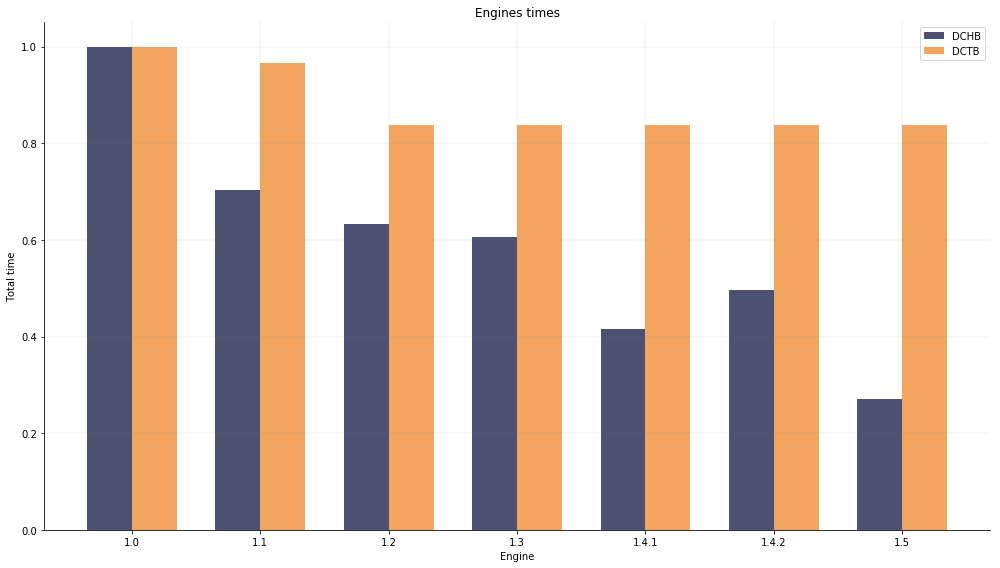

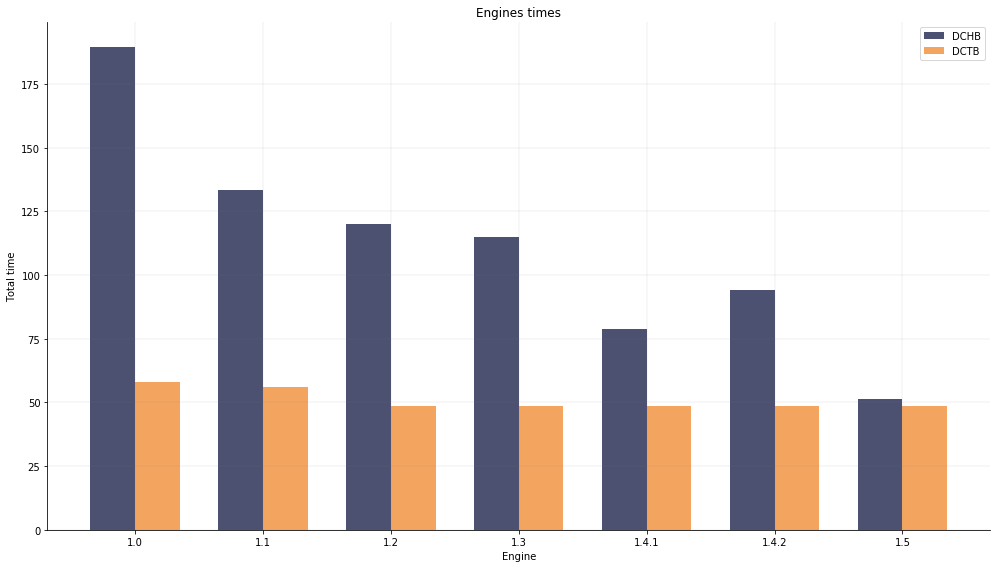

In [8]:
def hbtbplot(hb_t, tb_t, names, i_color=0):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(names))
    bar_width = 0.35

    if i_color >= 3:
        i_color = 0

    rectsHB = plt.bar(index, hb_t, bar_width, alpha=baralpha, color=contrast_colors[i_color], label="DCHB")
    rectsTB = plt.bar(index + bar_width, tb_t, bar_width, alpha=baralpha, color=contrast_colors[i_color+2], label="DCTB")

    plt.xlabel("Engine")
    plt.ylabel("Total time")
    plt.title("Engines times")
    plt.xticks(index + bar_width/2, names)
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    plt.show()

versions = ["1.0", "1.1", "1.2", "1.3", "1.4.1", "1.4.2", "1.5"]
hb_t     = np.array([189.75, 133.52, 120.02, 114.80, 78.66, 94.27, 51.18]) # UPDATE
tb_t     = np.array([ 58.18,  56.24,  48.78,  48.78, 48.78, 48.78, 48.78]) # UPDATE

# TODO: Start with this plot in my thesis when comparing versions
hbtbplot(hb_t/hb_t[0], tb_t/tb_t[0], versions, i_color=0)
hbtbplot(hb_t, tb_t, versions, i_color=0)

# Simulated magfield chi^2 probability

In [9]:
names = ["2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",
         "21","22","23","24","25","26","27","28","29","30"]

real_B = np.array([2.16694, 1.47946, 1.07637, 0.82461, 0.65694, 0.53967, 0.45439, 0.39038, 
                   0.34108, 0.30228, 0.27118, 0.24587, 0.22499, 0.20755, 0.19284, 0.18031, 
                   0.16955, 0.16025, 0.15214, 0.14503, 0.13877, 0.13322, 0.12828, 0.12386, 
                   0.11990, 0.11632, 0.11309, 0.11016, 0.10749])

sim_B  = []
sim_B.append(np.array([ # corners
        20.42347, 20.15383, 19.97091, 19.88973, 19.85036, 19.83086, 19.82241, 19.81760,
        19.81474, 19.81474, 19.81474, 19.81474, 19.81474, 19.80024, 19.80024, 19.80024,
        19.80024, 19.80024, 19.80024, 19.80024, 19.80024, 19.80024, 19.80024, 19.80024,
        19.80024, 19.80024, 19.80024, 19.80024, 19.80024
]))
sim_B.append(np.array([ # si = 100
        1.12042, 0.73905, 0.53669, 0.41775, 0.34280, 0.29297, 0.25824, 0.23306,
        0.21423, 0.19978, 0.18845, 0.17939, 0.17346, 0.16741, 0.16230, 0.15799,
        0.15432, 0.15115, 0.14841, 0.14602, 0.14391, 0.14204, 0.14038, 0.13890,
        0.13756, 0.13636, 0.13527, 0.13428, 0.13337
]))
sim_B.append(np.array([ # si = 50
        2.16420, 1.52247, 1.11956, 0.86450, 0.69398, 0.58611, 0.50260, 0.43702,
        0.38601, 0.34568, 0.31323, 0.28702, 0.26502, 0.24658, 0.23096, 0.21759,
        0.20606, 0.19604, 0.18728, 0.17956, 0.17312, 0.16702, 0.16158, 0.15669,
        0.15228, 0.14829, 0.14467, 0.14136, 0.13834
]))
sim_B.append(np.array([ # si = 20
        2.13378, 1.50786, 1.12267, 0.87384, 0.70614, 0.58816, 0.50195, 0.43695,
        0.38664, 0.34727, 0.31524, 0.28906, 0.26734, 0.24913, 0.23369, 0.22048,
        0.20908, 0.19916, 0.19049, 0.18285, 0.17608, 0.17006, 0.16467, 0.15982,
        0.15546, 0.15150, 0.14791, 0.14463, 0.14163
]))
sim_B.append(np.array([ # si = 10
        2.14817, 1.51631, 1.12815, 0.87774, 0.70944, 0.59111, 0.50437, 0.43897,
        0.38838, 0.34838, 0.31618, 0.28985, 0.26801, 0.24970, 0.23417, 0.22088,
        0.20940, 0.19980, 0.19106, 0.18337, 0.17656, 0.17050, 0.16507, 0.16020,
        0.15581, 0.15183, 0.14821, 0.14491, 0.14190
]))
sim_B.append(np.array([ # si = 5
        2.14730, 1.51887, 1.12852, 0.87897, 0.71014, 0.59127, 0.50443, 0.43936,
        0.38865, 0.34897, 0.31671, 0.29033, 0.26846, 0.25012, 0.23457, 0.22126,
        0.20977, 0.19979, 0.19105, 0.18335, 0.17653, 0.17045, 0.16535, 0.16047,
        0.15606, 0.15207, 0.14845, 0.14514, 0.14212
]))


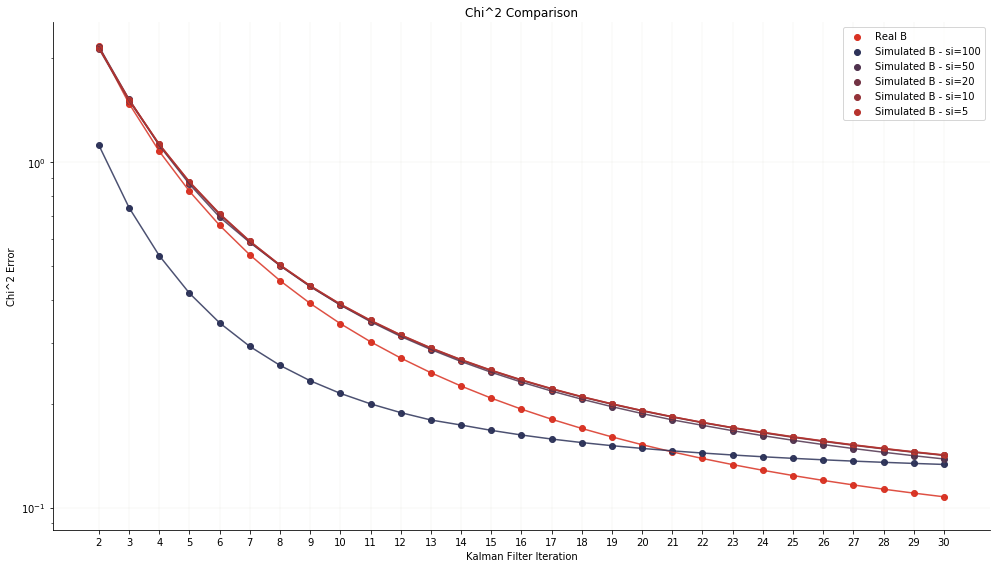

In [14]:
fig, ax = plt.subplots()
    
fig.set_size_inches(plot_size)
index = np.arange(len(names))

# REAL MAGNETIC FIELD PLOT
plt.scatter(index, real_B, c=red, label="Real B")
plt.plot(   index, real_B, c=red, alpha=baralpha)

# SIMULATED MAGNETIC FIELD PLOTS
plt.scatter(index, sim_B[1], c=hue_grad[0],  label="Simulated B - si=100")
plt.plot(   index, sim_B[1], c=hue_grad[0],  alpha=baralpha)

plt.scatter(index, sim_B[2], c=hue_grad[4],  label="Simulated B - si=50")
plt.plot(   index, sim_B[2], c=hue_grad[4],  alpha=baralpha)

plt.scatter(index, sim_B[3], c=hue_grad[8],  label="Simulated B - si=20")
plt.plot(   index, sim_B[3], c=hue_grad[8],  alpha=baralpha)

plt.scatter(index, sim_B[4], c=hue_grad[12], label="Simulated B - si=10")
plt.plot(   index, sim_B[4], c=hue_grad[12], alpha=baralpha)

plt.scatter(index, sim_B[5], c=hue_grad[16], label="Simulated B - si=5")
plt.plot(   index, sim_B[5], c=hue_grad[16], alpha=baralpha)

plt.yscale("log")
plt.xlabel("Kalman Filter Iteration")
plt.ylabel("Chi^2 Error")
plt.title("Chi^2 Comparison")
plt.xticks(index, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color=gray, linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

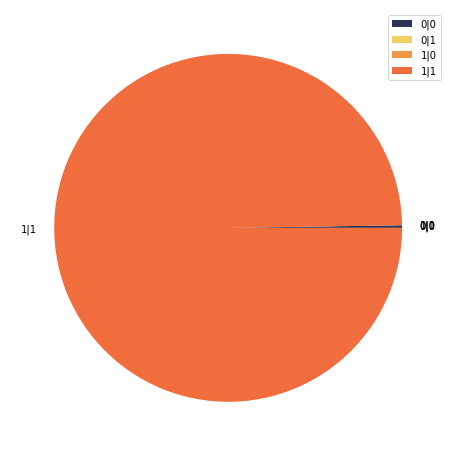

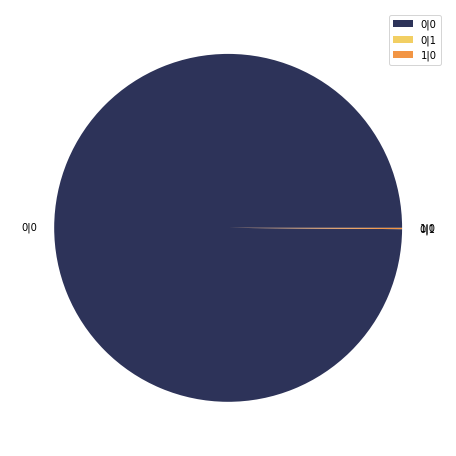

In [12]:
x = [51479, 2, 59, 21607688]
l = ["0|0", "0|1", "1|0", "1|1"]
c = [contrast_colors[0], contrast_colors[1], contrast_colors[2], contrast_colors[3]]

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
plt.pie(x, labels=l, colors=c)
plt.legend()
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
plt.pie(x[0:3], labels=l[0:3], colors=c[0:3])
plt.legend()
plt.show()

# Time per engine (20180907):

In [ ]:
def enginesplot(x, y, colors, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    y_pos = np.arange(len(x))
    plt.barh(y_pos, y, color=colors, align='center', alpha=baralpha)
    plt.yticks(y_pos, x)
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    plt.title(title)

    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.show()
# 20180907
names = [
    "READER"    , "MAGFIELDS" , "FTCAL"     , "FTHODO"    ,
    "FTEB"      , "DCHB"      , "FTOFHB"    , "EC"        ,
    "CVT"       , "CTOF"      , "CND"       , "HTCC"      ,
    "LTCC"      , "RICH"      , "EBHB"      , "DCTB"      ,
    "FTOFTB"    , "EBTB"      , "WRITER"
]
times = np.array([
      0.11,   0.01,   0.94,   0.87,
      0.70, 173.50,   1.14,   1.00,
     19.87,   1.23,   1.56,   0.57,
      0.29,   0.14,   1.60,  47.55,   
      1.17,   1.88,   1.85
])/255.98
colors = [
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#d93223", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#c6c3ba",
    "#c6c3ba", "#c6c3ba", "#c6c3ba", "#d93223",
    "#c6c3ba", "#c6c3ba", "#c6c3ba"
]

enginesplot(names, times, colors, "Engine Name", "Engine Time / Total Time", "Engine Times")